# Imports

In [112]:
import numpy as np
import pandas as pd
import os
from scipy.special import rel_entr
from scipy.stats import entropy

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from lib.tools import entries_2_matrix

# Custom functions

In [113]:
def P_Haar(F, n):
    return((2**n-1)*np.power(1-F, 2**n-2))

def F_Haar(n):
    return( 1/(np.power(2,n-1)*(np.power(2,n)+1)) )

# Data

In [114]:
path_2_results = 'results/sonar/linear/'

files = []

for file in os.listdir(path_2_results):
    if file.endswith(".csv"):
        files.append(os.path.join(path_2_results, file))

files.sort()

N_files = len(files)

In [115]:
path_2_results_full = 'results/sonar/full/'

files_full = []

for file in os.listdir(path_2_results_full):
    if file.endswith(".csv"):
        files_full.append(os.path.join(path_2_results_full, file))

files_full.sort()

N_files = len(files_full)

# Trace norm

We take the expressibility measure based on the trace norm of the $A$ superoperator
$$ A^{(t)}_{U}(\cdot) = \int_{Haar}d\mu(V) V^{\otimes t} (\cdot) (V^{\dagger})^{\otimes t} - \int_{U} du u^{\otimes t}(\cdot)(u^{\dagger})^{\otimes t}, $$
where, for simplicity we call the former integral $\nu_{Haar}$, and the latter $\mu$.
We are interested in answering how far is U from 2-design, therefore we fix $t=2$ and simplify notation $A^{(2)}_{U}(\cdot) = A_{U}(\cdot)$.
In order to obtain single number measure of the above superoperator we introduce expressibility measure as a trace norm 
$$ \epsilon(\cdot) = || A_U(\cdot) ||_2 $$
In the case of kernel estimation the measured operator is the $U$-transformed density operator of the initial state, therefore we fix
$$ \epsilon = \epsilon(\rho_0)  = || A_U(\rho_0) ||_2,\ \rho_0 = | 0 \rangle \langle 0 | $$

Expanding the square of the above defined expressibility, we can rephrase it with frame potentials
$$\epsilon^2 = || A_U(\rho_0) ||_2^2 = Tr[A_U^{\dagger}(\rho_0)A_U(\rho_0)] = F_U - F_{Haar}, $$
where
$$F_U = \int \int dU dV | \langle 0 | U V^{\dagger} | 0 \rangle |^4,$$
$$F_{Haar} = \frac{1}{2^{n-1}(2^n+1)} .$$
The frame potential $F_U$ will be approximated by the mean over map parameters.
We define the parameters data set as $\mathcal{X} = \{ (x_i,x_j) | i>j \}$. 
Therefore, we take only independent values of parameters.
The estimated frame potential is then
$$\hat{F}_U = \frac{1}{|\mathcal{X}|}\sum_{(x_i,x_j) \in \mathcal{X}}| \langle 0 | U(x_i) V^{\dagger}(x_j) | 0 \rangle |^4 \approx F_U$$

In [116]:
linear_qubits = 0
full_qubits = 0

for file in files:
    fidelities = pd.read_csv(file, header=None).to_numpy()
    linear_qubits += fidelities.shape[0]

for file in files_full:
    fidelities = pd.read_csv(file, header=None).to_numpy()
    full_qubits += fidelities.shape[0]

### Linear entanglement

In [117]:
expressibility_matrix = np.zeros((linear_qubits,4)) # ZZ reps, n ,Fhaar, FX

In [118]:
i = 0
for file in files:
    fidelities = pd.read_csv(file, header=None).to_numpy()
    ZZ_id = file.find('ZZ_')+3
    zz_reps = int(file[ZZ_id])
    for j, fids_n in enumerate(fidelities):
        n = j+2
        kernel_elements = entries_2_matrix(fids_n).flatten()
        FX = np.power(kernel_elements,2).mean()
        expressibility_matrix[i, 0] = zz_reps
        expressibility_matrix[i, 1] = n
        expressibility_matrix[i, 2] = F_Haar(n)
        expressibility_matrix[i, 3] = FX
        i += 1

In [119]:
epsilon = np.sqrt(expressibility_matrix[:, 3]-expressibility_matrix[:, 2])
print(epsilon)

[0.38662975 0.34634576 0.30364598 0.24724218 0.17540266 0.13608735
 0.11989378 0.10398129 0.09728088 0.08875195 0.0835747  0.45184964
 0.30292602 0.26009319 0.20400459 0.13730728 0.11168838 0.09849651
 0.0879033  0.08299228 0.07904059 0.07610352 0.4434028  0.3016335
 0.25901423 0.18912025 0.12301507 0.09984952 0.08891697 0.08068769
 0.07725081 0.07474974 0.07326909 0.31565513 0.26502978 0.23151359
 0.17004816 0.11055227 0.08682922 0.08199463 0.07725281 0.07392085
 0.07227118 0.07156929 0.41967157 0.27287235 0.20135123 0.15537391
 0.10632899 0.08350158 0.07829609 0.07428578 0.07236876 0.07123345
 0.0708235  0.3946484  0.26582622 0.18691683 0.13368542 0.09516766
 0.07885213 0.07553789 0.0724164  0.07132368 0.07059505 0.07038714]


In [120]:
E_m = np.hstack((expressibility_matrix, epsilon.reshape(len(epsilon),1)))

expr_m_reps = []
expr_m_reps = [E_m[(E_m[:,0] == i+1)] for i in range(int(max(E_m[:,0])))]
expr_m_reps_lin = np.array(expr_m_reps)


In [121]:
#path_2_expressibilities = 'results/sonar/expressibilities/'
#np.save(path_2_expressibilities+'expr_lin', expr_m_reps_lin)

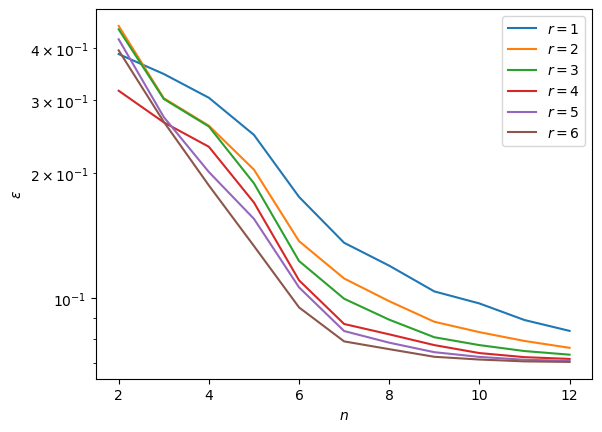

In [122]:
for i in range(len(expr_m_reps)):
    plt.plot(expr_m_reps[i][:,1],expr_m_reps[i][:,-1], label = r'$r =$'+str(i+1))

plt.yscale('log')
#plt.xscale('log')

plt.xlabel(r'$n$')
plt.ylabel(r'$\epsilon$')

plt.legend()
plt.show()

### Full entanglement

In [123]:
expressibility_matrix = np.zeros((full_qubits,4)) # ZZ reps, n ,Fhaar, FX

In [124]:
i = 0
for file in files_full:
    fidelities = pd.read_csv(file, header=None).to_numpy()
    ZZ_id = file.find('ZZ_')+3
    zz_reps = int(file[ZZ_id])
    for j, fids_n in enumerate(fidelities):
        n = j+2
        kernel_elements = entries_2_matrix(fids_n).flatten()
        FX = np.power(kernel_elements,2).mean()
        expressibility_matrix[i, 0] = zz_reps
        expressibility_matrix[i, 1] = n
        expressibility_matrix[i, 2] = F_Haar(n)
        expressibility_matrix[i, 3] = FX
        i += 1

In [125]:
for file in files_full:
    fidelities = pd.read_csv(file, header=None).to_numpy()

In [126]:
fidelities.mean(axis=1)

array([4.14498208e-01, 2.00966565e-01, 1.12808908e-01, 6.26139014e-02,
       2.22570975e-02, 1.07156109e-02, 5.34114306e-03, 2.50722800e-03,
       1.25150793e-03, 6.12399104e-04, 3.08334887e-04])

In [127]:
epsilon = np.sqrt(expressibility_matrix[:, 3]-expressibility_matrix[:, 2])
print(epsilon)

[0.38662975 0.34849443 0.25432989 0.22270319 0.13962609 0.10721089
 0.09551238 0.08396528 0.08248952 0.07546254 0.07522901 0.45184964
 0.30863422 0.19712473 0.1435673  0.0901854  0.07537822 0.0719855
 0.07039234 0.07001062 0.06959229 0.06953383 0.4434028  0.26657329
 0.16731832 0.11940371 0.0797332  0.07201179 0.07015859 0.06968908
 0.0694848  0.0693905  0.06936784 0.31565513 0.22763503 0.15491281
 0.11195597 0.07684509 0.07125904 0.06980489 0.06951143 0.06939195
 0.06935198 0.06934498 0.41967157 0.22360981 0.16491825 0.11195045
 0.07534841 0.07075978 0.06967517 0.06944038 0.06936495 0.06934272
 0.06934024 0.3946484  0.22218396 0.15490064 0.11036938 0.07416251
 0.07039434 0.06959752 0.06939924 0.06935413 0.06934029 0.06933879]


In [128]:
E_m = np.hstack((expressibility_matrix, epsilon.reshape(len(epsilon),1)))

In [129]:
expr_m_reps = []

#expr_m_reps = [E_m[(E_m[:,0] == i+1)] for i in range(int(max(E_m[:,0])))]
expr_m_reps = [E_m[(E_m[:,0] == i+1)] for i in range(int(max(E_m[:,0])))]
expr_m_full = np.array(expr_m_reps)


In [130]:
#path_2_expressibilities = 'results/sonar/expressibilities/'
#np.save(path_2_expressibilities+'expr_full', expr_m_reps_lin)

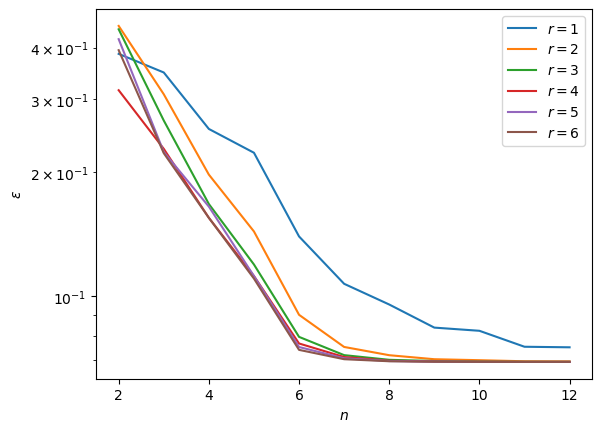

In [131]:
for i in range(len(expr_m_reps)):
    plt.plot(expr_m_reps[i][:,1],expr_m_reps[i][:,-1], label = r'$r =$'+str(i+1))

plt.yscale('log')

plt.xlabel(r'$n$')
plt.ylabel(r'$\epsilon$')

plt.legend()
plt.show()

## Lin and full entanglement

In [132]:
len(expr_m_reps_lin)

6

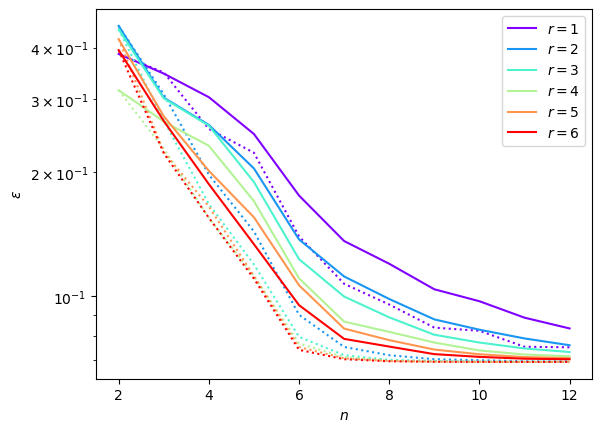

In [133]:
color = cm.rainbow(np.linspace(0, 1, len(expr_m_reps)))

for i in range(len(expr_m_reps)):
    plt.plot(expr_m_reps_lin[i][:,1],expr_m_reps_lin[i][:,-1], c=color[i], label = r'$r =$'+str(i+1))
    plt.plot(expr_m_reps[i][:,1],expr_m_reps[i][:,-1], c=color[i], linestyle = 'dotted') #label = r'$r =$'+str(i+1), 

plt.yscale('log')

plt.xlabel(r'$n$')
plt.ylabel(r'$\epsilon$')

plt.legend()
plt.show()

### Plot for paper

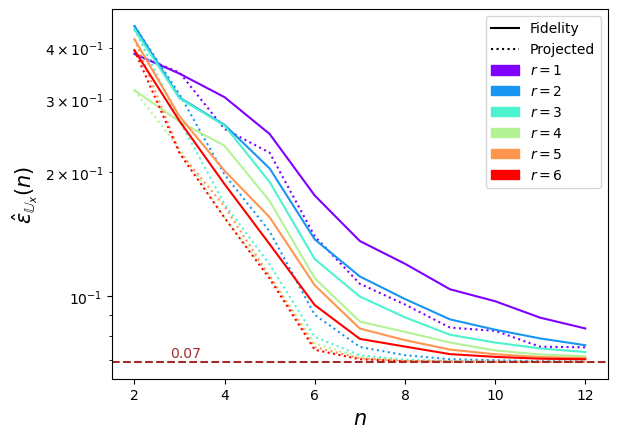

In [134]:
color = cm.rainbow(np.linspace(0, 1, len(expr_m_reps)))

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Fidelity'))
legend_entries.append(Line2D([], [], color='black', linestyle='dotted', label='Projected'))

for i in range(len(expr_m_reps)):
    plt.plot(expr_m_reps_lin[i][:,1],expr_m_reps_lin[i][:,-1], c=color[i])#, label = r'$r =$'+str(i+1)
    plt.plot(expr_m_reps[i][:,1],expr_m_reps[i][:,-1], c=color[i], linestyle = 'dotted') #label = r'$r =$'+str(i+1), 
    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

plt.axhline(y=expr_m_reps[-1][-1,-1], c='brown', linestyle = 'dashed')
plt.text(2.8,expr_m_reps[-1][-1,-1]+0.002, np.around(expr_m_reps[-1][-1,-1], decimals=2), c='brown')
plt.yscale('log')

plt.xlabel(r'$n$', fontsize=15)
plt.ylabel(r'$\hat{\varepsilon}_{\mathbb{U}_x}(n)$', fontsize=15)

plt.legend(handles=legend_entries)

#plt.savefig('imgs/Expressibility.pdf', transparent = True, bbox_inches='tight')
plt.show()

# Expressibility + Entanglement

## entanglement

In [135]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

import os

from lib.projected_kernel import densities_2_kernel
from lib.projected_kernel import get_independent_kernel_entries
from lib.projected_kernel import densities_MMS_entropy

In [136]:
path_2_results = 'results/sonar/reduced_density_matrices/linear/'

files = []

for file in os.listdir(path_2_results):
    if file.endswith(".npy"):
        files.append(os.path.join(path_2_results, file))

files.sort()

N_files = len(files)

path_2_results = 'results/sonar/reduced_density_matrices/full/'

files_full = []

for file in os.listdir(path_2_results):
    if file.endswith(".npy"):
        files_full.append(os.path.join(path_2_results, file))

files_full.sort()

N_files = len(files_full)

In [137]:
# Divide files into zz_reps

# Divide files into zz_reps
l_ZZ_lin = []
i = 1
while True:
    test_str = '_ZZ_' + str(i)
    temp_l = [s for s in files if test_str in s]

    if(temp_l == []):
        break
    
    l_ZZ_lin.append(temp_l)
    i += 1

l_ZZ = []
i = 1
while True:
    test_str = '_ZZ_' + str(i)
    temp_l = [s for s in files_full if test_str in s]

    if(temp_l == []):
        break
    
    l_ZZ.append(temp_l)
    i += 1

In [138]:
densities_temp = np.load(l_ZZ[0][8])
n = densities_temp.shape[1]

In [139]:
# import files for specific ZZ_REPS
ZZ_reps = 1
ZZ_reps_id = ZZ_reps-1

l_densities_1_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_1_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

ZZ_reps = 2
ZZ_reps_id = ZZ_reps-1

l_densities_2_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_2_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

ZZ_reps = 3
ZZ_reps_id = ZZ_reps-1

l_densities_3_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_3_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

ZZ_reps = 4
ZZ_reps_id = ZZ_reps-1

l_densities_4_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_4_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

ZZ_reps = 5
ZZ_reps_id = ZZ_reps-1

l_densities_5_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_5_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

ZZ_reps = 6
ZZ_reps_id = ZZ_reps-1

l_densities_6_lin = []

for qubit_id in range(len(l_ZZ_lin[ZZ_reps_id])):
    l_densities_6_lin.append(np.load(l_ZZ_lin[ZZ_reps_id][qubit_id]))

In [140]:
# import files for specific ZZ_REPS
ZZ_reps = 1
ZZ_reps_id = ZZ_reps-1

l_densities_1 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_1.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

ZZ_reps = 2
ZZ_reps_id = ZZ_reps-1

l_densities_2 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_2.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

ZZ_reps = 3
ZZ_reps_id = ZZ_reps-1

l_densities_3 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_3.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

ZZ_reps = 4
ZZ_reps_id = ZZ_reps-1

l_densities_4 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_4.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

ZZ_reps = 5
ZZ_reps_id = ZZ_reps-1

l_densities_5 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_5.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

ZZ_reps = 6
ZZ_reps_id = ZZ_reps-1

l_densities_6 = []

for qubit_id in range(len(l_ZZ[ZZ_reps_id])):
    l_densities_6.append(np.load(l_ZZ[ZZ_reps_id][qubit_id]))

In [141]:
n_range = np.arange(2,2+len(l_densities_1),1)

In [142]:
l_entropies_1 = []

for qubit_id in range(len(l_densities_1)):
    l_entropies_1.append(densities_MMS_entropy(l_densities_1[qubit_id]))

l_entropies_2 = []

for qubit_id in range(len(l_densities_2)):
    l_entropies_2.append(densities_MMS_entropy(l_densities_2[qubit_id]))

l_entropies_3 = []

for qubit_id in range(len(l_densities_3)):
    l_entropies_3.append(densities_MMS_entropy(l_densities_3[qubit_id]))

l_entropies_4 = []

for qubit_id in range(len(l_densities_4)):
    l_entropies_4.append(densities_MMS_entropy(l_densities_4[qubit_id]))

l_entropies_5 = []

for qubit_id in range(len(l_densities_5)):
    l_entropies_5.append(densities_MMS_entropy(l_densities_5[qubit_id]))

l_entropies_6 = []

for qubit_id in range(len(l_densities_6)):
    l_entropies_6.append(densities_MMS_entropy(l_densities_6[qubit_id]))

In [143]:
l_entropies_1_lin = []

for qubit_id in range(len(l_densities_1_lin)):
    l_entropies_1_lin.append(densities_MMS_entropy(l_densities_1_lin[qubit_id]))

l_entropies_2_lin = []

for qubit_id in range(len(l_densities_2_lin)):
    l_entropies_2_lin.append(densities_MMS_entropy(l_densities_2_lin[qubit_id]))

l_entropies_3_lin = []

for qubit_id in range(len(l_densities_3_lin)):
    l_entropies_3_lin.append(densities_MMS_entropy(l_densities_3_lin[qubit_id]))

l_entropies_4_lin = []

for qubit_id in range(len(l_densities_4_lin)):
    l_entropies_4_lin.append(densities_MMS_entropy(l_densities_4_lin[qubit_id]))

l_entropies_5_lin = []

for qubit_id in range(len(l_densities_5_lin)):
    l_entropies_5_lin.append(densities_MMS_entropy(l_densities_5_lin[qubit_id]))

l_entropies_6_lin = []

for qubit_id in range(len(l_densities_6_lin)):
    l_entropies_6_lin.append(densities_MMS_entropy(l_densities_6_lin[qubit_id]))

In [144]:
l_entropies_lin = [l_entropies_1_lin, l_entropies_2_lin, l_entropies_3_lin, l_entropies_4_lin, l_entropies_5_lin, l_entropies_6_lin]
l_mean_entropies_lin = []
for element in l_entropies_lin:
    l_mean_entropies_lin.append(np.array([e.mean(axis=1) for e in element]))

l_entropies = [l_entropies_1, l_entropies_2, l_entropies_3, l_entropies_4, l_entropies_5, l_entropies_6]
l_mean_entropies = []
for element in l_entropies:
    l_mean_entropies.append(np.array([e.mean(axis=1) for e in element]))

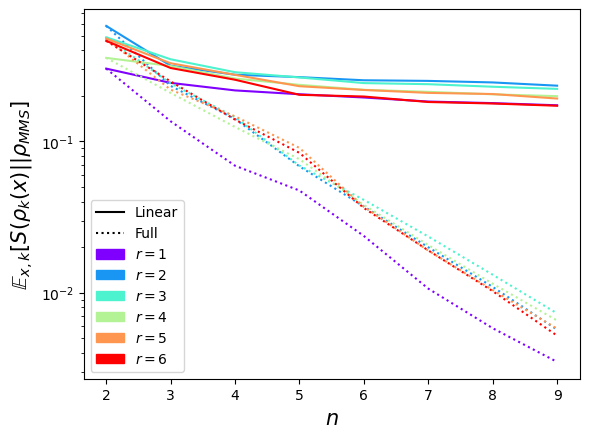

In [145]:
n_range = np.arange(2,2+len(l_mean_entropies_lin[0]),1)

color = cm.rainbow(np.linspace(0, 1, len(l_mean_entropies)))

legend_entries = []
legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Linear'))
legend_entries.append(Line2D([], [], color='black', linestyle='dotted', label='Full'))

for i in range(len(l_mean_entropies)):
    plt.plot(n_range[:-1], l_mean_entropies_lin[i][:8].mean(axis=1), c = color[i], linestyle = '-')
    plt.plot(n_range[:-1], l_mean_entropies[i][:8].mean(axis=1), c = color[i], linestyle = 'dotted')
    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

plt.yscale('log')
plt.ylabel(r'$\mathbb{E}_{x,k}[S(\rho_k(x) || \rho_{MMS} ]$', fontsize=15)
plt.xlabel(r'$n$', fontsize=15)
plt.legend(handles = legend_entries)
#plt.savefig('imgs/entropies.pdf', transparent=True, bbox_inches='tight')
plt.show()

## Together

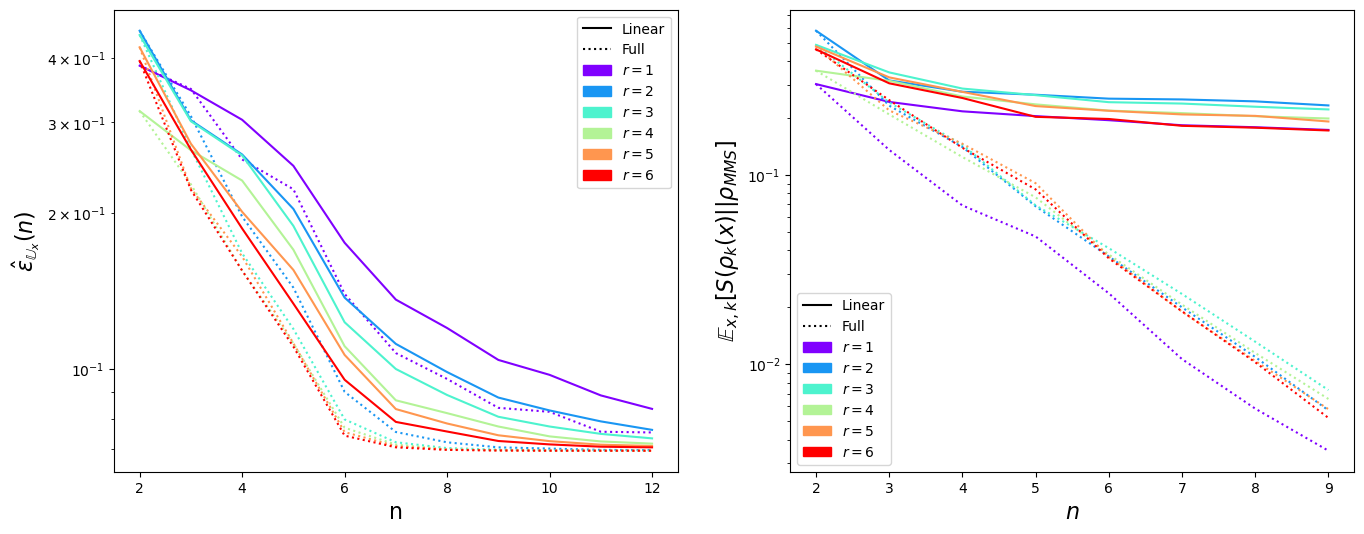

In [146]:
#color = cm.rainbow(np.linspace(0, 1, N_SR_FQ.shape[0]))

#bg_color = [plt.cm.Accent(i) for i in range(2)]

legend_entries = []

legend_entries.append(Line2D([], [], color='black', linestyle='-', label='Linear'))
legend_entries.append(Line2D([], [], color='black', linestyle='dotted', label='Full'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

##############Expressibility
color = cm.rainbow(np.linspace(0, 1, len(expr_m_reps_lin)))
bg_color = [plt.cm.Accent(i) for i in range(2)]

for i in range(len(expr_m_reps_lin)):
    ax[0].plot(expr_m_reps_lin[i][:,1],expr_m_reps_lin[i][:,-1], c=color[i])#, label = r'$r =$'+str(i+1)
    ax[0].plot(expr_m_reps[i][:,1],expr_m_reps[i][:,-1], c=color[i], linestyle = 'dotted') #label = r'$r =$'+str(i+1), 
    legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

#ax[0].axvline(n_limit, alpha=0.1)
#ax[0].axvspan(-10, 10, alpha=0.2, color=bg_color[0])
#ax[0].axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

#ax[0].text(n_limit-5,1.e12,'Simulated', rotation='vertical')
#ax[0].text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')
    
ax[0].set_yscale('log')
ax[0].legend(handles=legend_entries)
ax[0].set_xlabel('n', fontsize=16)
ax[0].set_ylabel(r'$\hat{\varepsilon}_{\mathbb{U}_x}(n)$', fontsize=16)
#ax[0].set_xlim((0,100))
#ax[0].set_ylim((1.e-15,2.e57))
#ax[0].set_title(r'Sonar: Runtime')

##############
##############Entanglement

for i in range(len(l_mean_entropies)):
    ax[1].plot(n_range[:-1], l_mean_entropies_lin[i][:8].mean(axis=1), c = color[i], linestyle = '-')
    ax[1].plot(n_range[:-1], l_mean_entropies[i][:8].mean(axis=1), c = color[i], linestyle = 'dotted')
    #legend_entries.append( mpatches.Patch(color=color[i], label=r'$r =$'+str(i+1)) )

#ax[1].axvline(n_limit, alpha=0.1)
#ax[1].axvspan(-10, n_limit, alpha=0.2, color=bg_color[0])
#ax[1].axvspan(n_limit, N_ext['n'].to_numpy()[-1]+10, alpha=0.2, color=bg_color[1])

#ax[1].text(n_limit-5,1.e12,'Simulated', rotation='vertical')
#ax[1].text(n_limit+2,1.e12,'Extrapolated', rotation='vertical')

#ax[1].fill_between(df_advantage_E['n'], df_advantage_E['FTEnergy[J]'], df_advantage_E['Henri_E_MAX'], alpha = .4)
ax[1].set_yscale('log')
ax[1].legend(handles=legend_entries)
ax[1].set_ylabel(r'$\mathbb{E}_{x,k}[S(\rho_k(x) || \rho_{MMS} ]$', fontsize=16)
ax[1].set_xlabel(r'$n$', fontsize=16)
#ax[1].set_xlim((2,10))
#ax[1].set_xlabel('n')
#ax[1].set_ylabel(r'$E\ [J]$')
#ax[1].set_xlim((0,100))
#ax[1].set_ylim((1.e-7,2.e62))
#ax[1].set_title(r'Sonar: Energy consumption')
##############

#plt.savefig('imgs/expressibility_entanglement.pdf', transparent=True, bbox_inches='tight')
plt.show()